## 영화 관객수 예측 모델 개발 EDA

- 데이터 확인
- 데이터 정제
- 특성 엔지니어링
- 상관 관계 분석

### 데이터 확인

In [3]:
# 변수 확인

import pandas as pd

movie_num = pd.read_csv('./data/movies_train.csv')
movie_test = pd.read_csv('./data/movies_test.csv')

movie_num.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


총 11개의 변수를 가지고 있음을 알 수 있다.
<br>
각 변수는 다음과 같다.

|변수|의미 |
|:---|:---|
|title | 영화의 제목|
| distributor | 배급사 |
| genre | 장르|
| release_time | 개봉일|
| time | 상영시간(분)|
| screening_rat | 상영등급|
| director | 감독이름|
| dir_prev_bfnum | 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)|
|dir_prev_num | 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)|
| num_staff | 스텝수|
| num_actor | 주연배우수|
| box_off_num | 관객수|

In [8]:
movie_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [9]:
movie_num.shape

(600, 12)

In [5]:
movie_num.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


time(영화 상영 시간)의 평균이 100분임을 알 수 있다.

##### Raw 데이터 확인

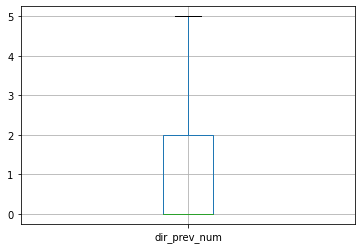

In [10]:
boxplot = movie_num.boxplot(column = ['dir_prev_num'])

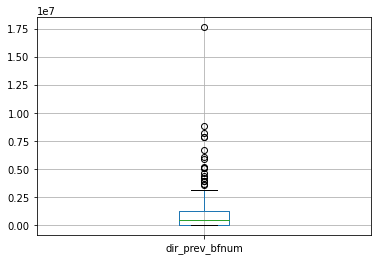

In [11]:
boxplot = movie_num.boxplot(column = ['dir_prev_bfnum'])

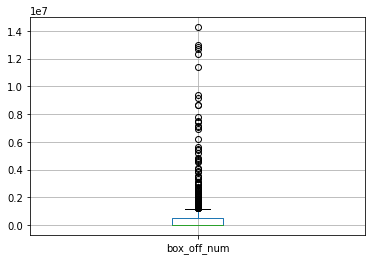

In [12]:
boxplot = movie_num.boxplot(column = ['box_off_num'])

##### histogram

row data에서 histogram을 판별할 데이터는 없다. 관객 수 일정 수 이상 등 구간을 나눈 뒤에 사용하도록 한다.

## 데이터 정제

In [13]:
movie_num.isnull().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

결측값이 존재하는 상태로 모델을 만들 경우, 변수 간의 관계가 왜곡될 수 있고 모델의 정확성이 떨어지게 된다.
<br>
따라서 `dir_prev_bfnum` 변수를 전체 삭제 하도록 한다.

In [4]:
movie_num.drop(['dir_prev_bfnum'], axis = 'columns', inplace = True)
movie_num.head()

movie_test.drop(['dir_prev_bfnum'], axis = 'columns', inplace = True)
movie_test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,1,380,1


In [15]:
movie_num.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,0,363,5,7166532


##### 최다 관객수 Top10

`box_off_num`(관객수)를 기준으로 최다 관객수의 영화부터 정렬한다.

In [18]:
movie_num_sorted = movie_num.sort_values(by = 'box_off_num', ascending = False)
movie_num_sorted.head(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num,num_staff,num_actor,box_off_num
372,국제시장,CJ 엔터테인먼트,드라마,2014-12-17,126,12세 관람가,윤제균,0,869,4,14262766
362,도둑들,(주)쇼박스,느와르,2012-07-25,135,15세 관람가,최동훈,3,462,10,12983841
530,7번방의 선물,(주)NEW,코미디,2013-01-23,127,15세 관람가,이환경,2,300,8,12811435
498,암살,(주)쇼박스,액션,2015-07-22,139,15세 관람가,최동훈,4,628,3,12706663
460,"광해, 왕이 된 남자",CJ 엔터테인먼트,드라마,2012-09-13,131,15세 관람가,추창민,2,402,3,12323595
122,변호인,(주)NEW,드라마,2013-12-18,127,15세 관람가,양우석,0,311,5,11374879
496,설국열차,CJ 엔터테인먼트,SF,2013-08-01,125,15세 관람가,봉준호,0,67,10,9350351
101,관상,(주)쇼박스,드라마,2013-09-11,139,15세 관람가,한재림,2,298,6,9135806
505,해적: 바다로 간 산적,롯데엔터테인먼트,SF,2014-08-06,130,12세 관람가,이석훈,3,868,2,8666208
476,수상한 그녀,CJ 엔터테인먼트,코미디,2014-01-22,124,15세 관람가,황동혁,2,437,5,8659725


##### 최소 관객수 10

In [21]:
movie_num_sorted = movie_num.sort_values(by = 'box_off_num', ascending = False)
movie_num_sorted.tail(10)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num,num_staff,num_actor,box_off_num
428,한민족 그리고 조선족,한국YWCA연합회,다큐멘터리,2014-12-10,61,전체 관람가,전화성,3,2,6,71
168,망대,골든타이드픽처스,다큐멘터리,2015-03-12,66,전체 관람가,문승욱,0,13,0,65
193,러브멘토,나우콘텐츠,멜로/로맨스,2014-04-17,74,청소년 관람불가,신혜성,1,0,2,54
448,나의 불행에는 이유가 있다,위드시네마,드라마,2010-11-25,86,15세 관람가,한상민,0,0,4,46
177,90분,사람과 사람들,공포,2012-08-23,94,청소년 관람불가,박선욱,0,55,2,42
481,려수,(주) 영화사조제,드라마,2011-11-10,98,15세 관람가,진광교,0,1,2,36
410,전망 좋은 방-밀애,(주) 케이알씨지,멜로/로맨스,2012-11-08,71,청소년 관람불가,이세일,0,0,3,10
338,타부 : 금지된 사랑,고구마공작소,멜로/로맨스,2015-09-03,78,청소년 관람불가,고구마,1,27,3,8
324,청아,인피니티엔터테인먼트,드라마,2014-09-25,92,청소년 관람불가,김정호,0,3,4,2
432,젊은 엄마 2,골든타이드픽처스,멜로/로맨스,2014-05-29,89,청소년 관람불가,노성수,0,0,1,1


##### 이상치 처리

먼저, `box_off_num`(관객수)의 이상치를 처리해보자.

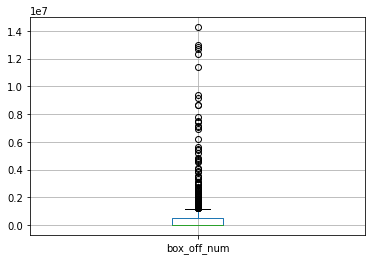

In [19]:
boxplot = movie_num.boxplot(column = ['box_off_num'])

`boxplot`의 25~75% 구간인 박스는 IQR(Inter Quartile Range)라고 부른다.

25%부분에서 아래로 1.5배 IQR 크기만큼 내려가면 최소값 검은선으로 표시되어 있고, 마찬가지로 75%부분에서 위로 1.5배 IQR 크기만큼 올라가면 최대값이 검은선으로 표시되어 있다.

이 검은 선을 벗어나는 값들을 우리는 IQR의 범위를 벗어나는 이상치라 표현한다.

이러한 이상치를 눈으로 확인하는 것 뿐만 아니라 실제 값들을 코드를 통해 구하는 방법은 아래와 같다.

In [20]:
box_bottom = movie_num['box_off_num'].quantile(.25)
box_top = movie_num['box_off_num'].quantile(.75)

IQR = box_top - box_bottom

out_top = movie_num[movie_num['box_off_num']>box_top+1.5*IQR]
out_bottom = movie_num[movie_num['box_off_num']<box_bottom-1.5*IQR]

print("box_bottom: {}\n".format(box_bottom))
print("box_top: {}\n".format(box_top))
print("out_top: \n{}\n".format(out_top))
print("out_bottom: \n{}".format(out_bottom))

box_bottom: 1297.25

box_top: 479886.75

out_top: 
         title      distributor   genre release_time  time screening_rat  \
1         내부자들           (주)쇼박스     느와르   2015-11-19   130      청소년 관람불가   
2    은밀하게 위대하게           (주)쇼박스      액션   2013-06-05   123       15세 관람가   
16          써니  CJ E&M Pictures     코미디   2011-05-04   124       15세 관람가   
20   두근두근 내 인생        CJ 엔터테인먼트     드라마   2014-09-03   117       12세 관람가   
34      오싹한 연애        CJ 엔터테인먼트  멜로/로맨스   2011-12-01   114       12세 관람가   
..         ...              ...     ...          ...   ...           ...   
592      차이나타운         CGV아트하우스     느와르   2015-04-29   110      청소년 관람불가   
595         해무           (주)NEW     드라마   2014-08-13   111      청소년 관람불가   
596       파파로티           (주)쇼박스     드라마   2013-03-14   127       15세 관람가   
598     악의 연대기        CJ 엔터테인먼트     느와르   2015-05-14   102       15세 관람가   
599        베를린        CJ 엔터테인먼트      액션   2013-01-30   120       15세 관람가   

    director  dir_prev_num  num_staf

이상치라고 값을 삭제할 경우, '최다 관객수 Top10' 및 '최소 관객수'의 내용이 삭제된다. 손실되는 데이터가 y값을 예측하는 데에 큰 오류를 낼 수 있으므로, 이상치를 처리를 하지 않는다.

## 상관 관계 분석

In [24]:
movie_num.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


피어슨 상관 계수는 각 변수의 분포가 얼마나 비슷한지를 나타내기에 각 변수 간의 관계를 알 수 있다.

# Model

datetime을 사용해 `release_time` 데이터를 유동적으로 활용할 수 있도록 한다.

In [5]:
movie_num["release_time"] = pd.to_datetime(movie_num["release_time"], format='%Y-%m-%d', errors='raise')
movie_num["release_time_year"] = movie_num["release_time"].dt.year
movie_num["release_time_month"] = movie_num["release_time"].dt.month
movie_num["release_time_day"] = movie_num["release_time"].dt.day

movie_num.head()


movie_test["release_time"] = pd.to_datetime(movie_test["release_time"], format='%Y-%m-%d', errors='raise')
movie_test["release_time_year"] = movie_test["release_time"].dt.year
movie_test["release_time_month"] = movie_test["release_time"].dt.month
movie_test["release_time_day"] = movie_test["release_time"].dt.day

movie_test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_num,num_staff,num_actor,release_time_year,release_time_month,release_time_day
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,2,304,3,2010,1,7
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,4,275,3,2010,1,14
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,3,419,7,2010,1,28
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,2,408,2,2010,2,4
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,1,380,1,2010,2,18


In [5]:
movie_num.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_time_year,release_time_month,release_time_day
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452,-0.062575,-0.023969,-0.005590
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184,-0.002137,0.064117,-0.111972
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674,0.132621,0.034019,0.031544
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265,-0.032891,-0.002841,-0.009567
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179,-0.098869,-0.015063,-0.017823
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000,-0.002497,0.019104,-0.026700
release_time_year,-0.062575,-0.002137,0.132621,-0.032891,-0.098869,-0.002497,1.000000,0.046627,0.018432
release_time_month,-0.023969,0.064117,0.034019,-0.002841,-0.015063,0.019104,0.046627,1.000000,-0.051436
release_time_day,-0.005590,-0.111972,0.031544,-0.009567,-0.017823,-0.026700,0.018432,-0.051436,1.000000


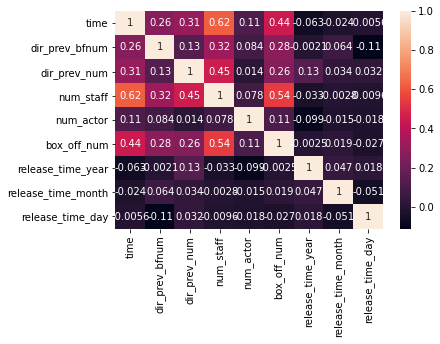

In [7]:
import seaborn as sns
sns.heatmap(movie_num.corr(), annot=True)

##### genre별 가중치 부여

In [6]:
movie_num_genre = pd.get_dummies(movie_num, columns=['genre'], prefix='genre')
movie_num_genre.head()

movie_test_genre = pd.get_dummies(movie_test, columns=['genre'], prefix='genre')
movie_test_genre.head()

,title,distributor,release_time,time,screening_rat,director,dir_prev_num,num_staff,num_actor,release_time_year,...,genre_느와르,genre_다큐멘터리,genre_드라마,genre_멜로/로맨스,genre_뮤지컬,genre_미스터리,genre_서스펜스,genre_애니메이션,genre_액션,genre_코미디
0,용서는 없다,시네마서비스,2010-01-07,125,청소년 관람불가,김형준,2,304,3,2010,...,1,0,0,0,0,0,0,0,0,0
1,아빠가 여자를 좋아해,(주)쇼박스,2010-01-14,113,12세 관람가,이광재,4,275,3,2010,...,0,0,0,1,0,0,0,0,0,0
2,하모니,CJ 엔터테인먼트,2010-01-28,115,12세 관람가,강대규,3,419,7,2010,...,0,0,1,0,0,0,0,0,0,0
3,의형제,(주)쇼박스,2010-02-04,116,15세 관람가,장훈,2,408,2,2010,...,0,0,0,0,0,0,0,0,1,0
4,평행 이론,CJ 엔터테인먼트,2010-02-18,110,15세 관람가,권호영,1,380,1,2010,...,0,0,0,0,0,0,0,0,0,0


## Linear Regression

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

NameError: name 'X' is not defined

In [10]:
model.fit(train_Xdata, train_ydata)
model3.fit(train_Xdata3, train_ydata3)

NameError: name 'train_Xdata' is not defined